In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/jpfaendt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Getting started - we all need to download 1 zip file with needed text files 

### The location fo the file is: prg.washington.edu/DIRECTfiles/W2L2files.zip

### Warmup - learning about sample size and statistical results

* Person 1: type the cell 
* Person 2: explain what you think each line is doing while your partner types it, if neither of you know what a line does make a guess based on the syntax 
* Execute the cell (using shift-enter) 5 times with the default values (T=5,N=10)
* Execute the cell increasing N by 10X each time and observe results 
* What level of sampling are you and your partner comfortable with to achieve the expected results? 
* What is the difference between the average bar plot of five N=10 samples and the bar plot of one N=50 sample
* How could we quantify this? 

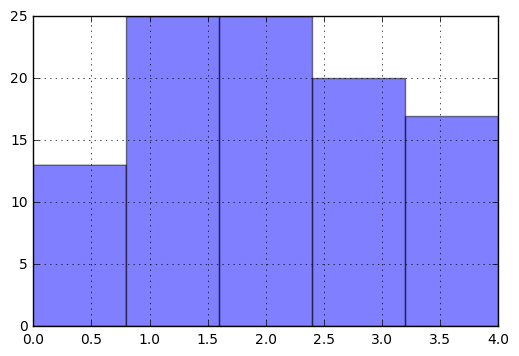

In [35]:
tables=5
N=100
rands=np.random.randint(tables, size=N)

plt.hist(rands, bins=5, alpha=0.5)
plt.grid(True)
plt.show()

## Lets look at some descriptive statistics on simulation results of a simple molecule 

* Molecule description
* Why it matters and what matters about it
* What we will be looking at 

<img src="https://www.researchgate.net/profile/Davide_Branduardi/publication/220258613/figure/fig1/AS:277569061572636@1443189029820/FIG-2-Ball-and-stick-representation-of-alanine-dipeptide-Ace-Ala-Nme-in-vacuum-The.png">

<img src="http://prg.washington.edu/DIRECTimg/fes_bias.png">

In [19]:
data=np.genfromtxt('W2L2files/phipsi.dat',comments='#')

In [36]:
data.shape

(49999, 3)

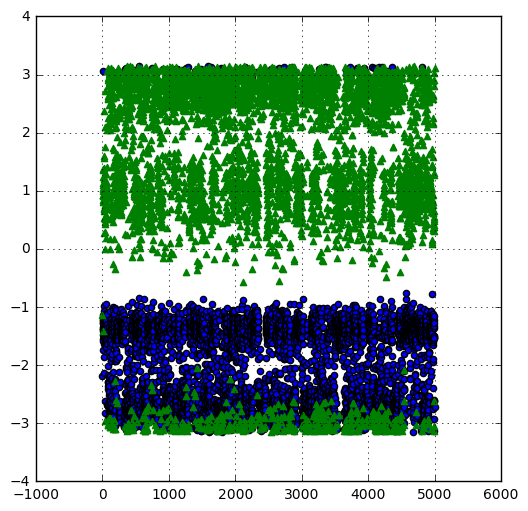

In [3]:
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.scatter(data[::10,0],data[::10,1])
plt.scatter(data[::10,0],data[::10,2],marker='^',color='green')
plt.grid()

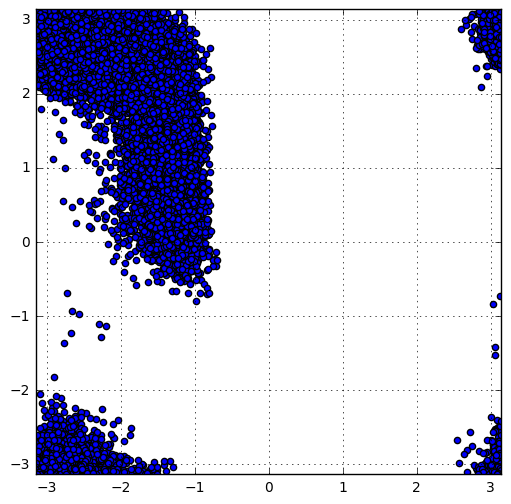

In [4]:
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.scatter(data[:,1],data[:,2],marker='o')
plt.xlim([-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.grid()

### Assuming this is the exact data we want , lets look at some descriptive statistics 

* Please note - in reality you would **never** calculate descriptive statistics on this data without some conditioning
* The reason is that the data in x/y (phi and psi) are **periodic**.  So the value of phi at -pi = pi.  Therefore, as Dave pointed out in lecture - if your data are 50% -pi and 50% +pi your mean would be zero, which is not accurate 
* For the purposes of these calculations we will treat them like continuous data and neglect the periodicity 

# Key Definitions 

## Variable types 

1. Discrete vs continuous 
    * The value of the dihedral angle at time = 10 ns 
    * Which week of Winter quarter are we in?  
 
2. **uni**variate vs **multi**variate data sets
    * Only the angle _phi_ is monitored in the experiment 
    * Both the angle _phi_ and the terminal C=O bind length are monitored in experiment (e.g., **bi**variate)   
    
3. Differentiating between the **population** and the **sample**
     
## Three standard categories of "measurements" of our data

1. Measures of **center**:  
    * _Population_ mean:   $\mu = \sum X_i / N $ 
    * _Sample_ mean: $\bar x = \sum x_i / n $ 
        * Often $X_i$ and $N$ are used for **population** and $x_i$ and $n_ for **sample**
    * Median: _the value that separates the upper and lower 50% of data when sorted_
        * Use of median can protect against outliers skewing the data 

2. Measures of **position**: 
    * Quartile:  _the value that markes a gradation in 25% of the data set_ 
    * Percentile: _the value that markes the $n^{th}$ percentage of the data set_ 
        * The 2nd quartile is identical to the median 
        * If you are in the 90th _percentile_ of a group of scores, your score is higher than 90% of test takers
    * If a measure of position falls between two numbers the _mean_ of the pair is used: 
        * The mean of $[1,2,3,4]$ is $\frac{2+3}{2}=2.5$
  
3. Measures of **spread** or **variability**: 
    * _Population_ variance: $\sigma^2 = \frac{\sum (X_i - \mu)^2}{ N} $
    * _Population_ standard deviation: $\sigma =\ \sqrt{\frac{\sum (X_i - \mu)^2}{ N}}$
    * _Sample_ variance: $s^2 = \frac{\sum (x_i - \bar x)^2}{n-1} $
    * _Sample_ standard deviation: $s =\ \sqrt{\frac{\sum (x_i - \bar x)^2}{n-1}}$
    * The range of +/- 1Q around the median (i.e., _interquartile range_) is also used
        * $IQR = Q3-Q1$

### Sample mean calculated in 3 ways (maybe 3.5 ways) 

In [107]:
# Brutest force 
sum=0
count=0

for x in np.nditer(data[:,1]):
    sum+=x
    count+=1
    
mean=sum/count

print(mean)

-1.93639673557


In [110]:
# Brute force 

mean=np.sum(data[:,1])/np.shape(data[:,1])[0]
print(mean)

-1.93639673557


In [111]:
# The right way to do it 

print (np.mean(data[:,1]))

-1.93639673557


In [113]:
# Lets blaze
print (data[:,1].mean())

-1.93639673557


### With a partner [whoever is newer at Python should type first with the more experienced person helping]

1) Read in the same phile (phipsi.data) as a pandas data frame. Reminder: the three columns are the time step of the observation, the angle $\Phi$ and the angle $\Psi$    
2) Repeat the calculation of the mean with the pandas data set  
3) Switch to a different person working   
4) Calculate the sample **and** population standard deviation using one (_not both_) of the brute force ways and compare them to the automatic ways to do it both with numpy and pandas

In [5]:
pddata=pd.read_csv('W2L2files/phipsi.dat',comment='#',header=0,names=["time","phi","psi"],delimiter=' ')
print(pddata.describe())

sum=0
count=0
for x in np.nditer(pddata.phi):
    sum+=x
    count+=1

    
print (sum/count)
print (pddata.phi.sum()/len(pddata.phi))
print (np.mean(pddata.phi))
print (pddata.phi.mean())
    
## I have evidenced a very bad principle in this cell related to use of Jupyter notebooks (hint line 1). Why?

               time           phi           psi
count  49998.000000  49998.000000  49998.000000
mean    2499.950119     -1.936392      1.510293
std     1443.332440      0.918635      1.595412
min        0.100000     -3.141553     -3.141346
25%     1250.025059     -2.671801      0.845398
50%     2499.950119     -1.878216      1.870596
75%     3749.875178     -1.368765      2.751570
max     4999.800237      3.141560      3.141501
-1.93639163739
-1.93639163739
-1.93639163739
-1.93639163739


### Lets regroup 

* Any questions asbout what we just did. We often do a lot of mathematical operations that **don't have built in libraries** so it is useful to begin to get some practice doing calculations on our data.  More soon! 
* One note of advice - towards building great 1-liners 
* One final note of caution - degrees of freedom! 


In [12]:
# Some further calculation of descriptive statistics - the standard deviation 

# this is a python 1-liner to calculate the population standard deviation  
# see if you can break it out into separate parts and connect it to the math written above 
mystd=np.sqrt(np.sum(np.power(pddata.phi-pddata.phi.mean(),2))/len(pddata.phi))

# how would you change it to the calculatino of the sample standard deviation? 

print (mystd)

#pandas calculation of standard deviation 
print pddata.phi.std()
#numpy calculation of standard deviation 
print np.std(pddata.phi)

0.918626247319
0.918635434087
0.918626247319


### It is important to me that you understand why the default pandas and numpy standard deviations are different

* You can modify the function call of **both** functions to get either the sample or population standard deviation. 
* There is an additional argument ddof that controls this 

### Calculating descriptive statistics and making a box plot 

In [18]:
# Option 1 - pandas 
pddata.describe()

# what's missing? (hint the answer is median)

,time,phi,psi
count,49998.000000,49998.000000,49998.000000
mean,2499.950119,-1.936392,1.510293
std,1443.332440,0.918635,1.595412
min,0.100000,-3.141553,-3.141346
25%,1250.025059,-2.671801,0.845398
50%,2499.950119,-1.878216,1.870596
75%,3749.875178,-1.368765,2.751570
max,4999.800237,3.141560,3.141501


In [21]:
print (pddata.median())

print (pddata.phi.median())

# Quick question - if asked you to manually calculate the some of the measures of position
# what would your strategy be? 

time    2499.950119
phi       -1.878216
psi        1.870596
dtype: float64
-1.8782165


/Users/jpfaendt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


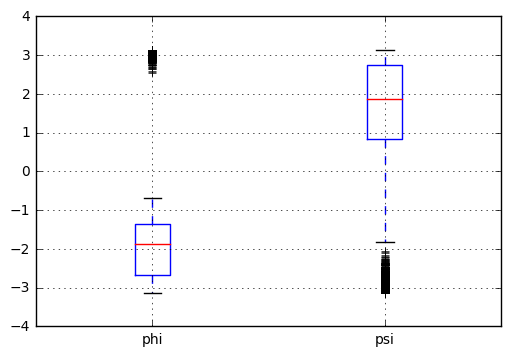

In [15]:
# a basic box plot to show some of the descriptive statistics 

pddata.boxplot(['phi','psi']);

In [16]:
# we can infer what is on the box plot even if we don't understand it :) 
pddata.describe()

,time,phi,psi
count,49998.000000,49998.000000,49998.000000
mean,2499.950119,-1.936392,1.510293
std,1443.332440,0.918635,1.595412
min,0.100000,-3.141553,-3.141346
25%,1250.025059,-2.671801,0.845398
50%,2499.950119,-1.878216,1.870596
75%,3749.875178,-1.368765,2.751570
max,4999.800237,3.141560,3.141501


### Previewing what is next - distributions 

